# t-sne Visualizer

- Pull in vectors of studies
- t-sne plot

### Choose Experiment Group & ID

In [55]:
exp_group = 'unseen'
exp_id = 16

### Load Study Vectors

In [56]:
X = pickle.load(open('store/study_vecs/{}/{}.p'.format(exp_group, exp_id))).astype('float64')

X.shape

(2450, 999)

### Load Corresponding `CDNO`s

In [60]:
nb_data = pd.Series.from_csv('store/hyperparams/{}/{}.csv'.format(exp_group, exp_id))['nb-data']
nb_data = float(nb_data)

from sklearn.cross_validation import train_test_split

# Load cdnos
df = pd.read_csv('../experiments/data/extra/pico_cdsr.csv', index_col=0)
cdnos = np.array(df.groupby('cdno').size().sort_values(ascending=False).index)
nb_study = len(cdnos)

train_cdno_idxs, val_cdno_idxs = train_test_split(range(nb_study), random_state=1337)
first_val = np.floor(len(val_cdno_idxs)*nb_data)
val_cdno_idxs = np.sort(val_cdno_idxs)[:first_val.astype('int')]
top_cdnos = set(cdnos[val_cdno_idxs])
cdnos = df[df.cdno.map(lambda cdno: cdno in top_cdnos)].cdno.reset_index(drop=True)

Randomly pick out the studies from `nb_review` reviews and plot them.

In [61]:
nb_review = 8
small_cdno_set = np.random.choice(list(top_cdnos), size=nb_review, replace=False)
tsne_mask = cdnos.map(lambda cdno: cdno in small_cdno_set)
X_tsne, cdnos_tsne = X[np.array(tsne_mask)], cdnos[tsne_mask]

### t-sne plot

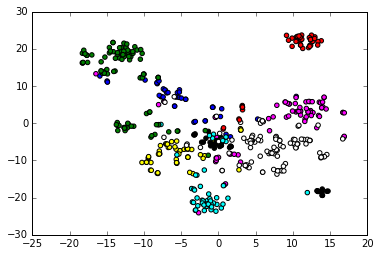

In [62]:
from tsne import bh_sne

X_tsne = bh_sne(X_tsne)

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'white']
cmap = {cdno: color for cdno, color in zip(small_cdno_set, colors[:nb_review])}
plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=cdnos_tsne.map(cmap))